In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# read in csv
df = pd.read_csv("/Users/jenniferrosen/Desktop/practical02/experiment_results.csv")

# cleaning
df['search_memory'] = df['search_memory'].abs()

df

,vector_db,embedding_model,chunk_size,chunk_overlap,llm,ingest_time,ingest_memory,search_time,search_memory,compute_proc_type,query,search_results
0,chroma,hkunlp/instructor-xl,200,0,llama3.2:latest,275.805499,520.812500,4.888769,575.875000,arm64,What is Acid compliance?,"Based on the context provided, I don't know wh..."
1,chroma,hkunlp/instructor-xl,200,0,llama3.2:latest,275.805499,520.812500,2.445778,117.546875,arm64,How do you rotate a tree with a RL case?,I don't know.
2,chroma,hkunlp/instructor-xl,200,0,llama3.2:latest,275.805499,520.812500,4.771622,280.593750,arm64,What is a mongodb query to add a filter to a s...,"Based on the provided context, I believe you a..."
3,chroma,hkunlp/instructor-xl,200,0,llama3.2:latest,275.805499,520.812500,3.621537,49.421875,arm64,What is the advantage of using json in documen...,I don't know. The provided context does not me...
4,chroma,hkunlp/instructor-xl,200,0,llama3.2:latest,275.805499,520.812500,1.336342,58.625000,arm64,How are collisions handled in a hash table?,I don't know. The provided context does not me...
...,...,...,...,...,...,...,...,...,...,...,...,...
939,faiss,all-mpnet-base-v2,1000,100,mistral:latest,33.174728,1108.796875,4.011842,904.140625,arm64,What is Acid compliance?,"Based on the provided context, ACID compliance..."
940,faiss,all-mpnet-base-v2,1000,100,mistral:latest,33.174728,1108.796875,1.918095,131.812500,arm64,How do you rotate a tree with a RL case?,I don't know.
941,faiss,all-mpnet-base-v2,1000,100,mistral:latest,33.174728,1108.796875,3.816630,70.421875,arm64,What is a mongodb query to add a filter to a s...,To add a filter to a specific data value in Mo...
942,faiss,all-mpnet-base-v2,1000,100,mistral:latest,33.174728,1108.796875,6.360108,61.000000,arm64,What is the advantage of using json in documen...,The advantages of using JSON in document datab...


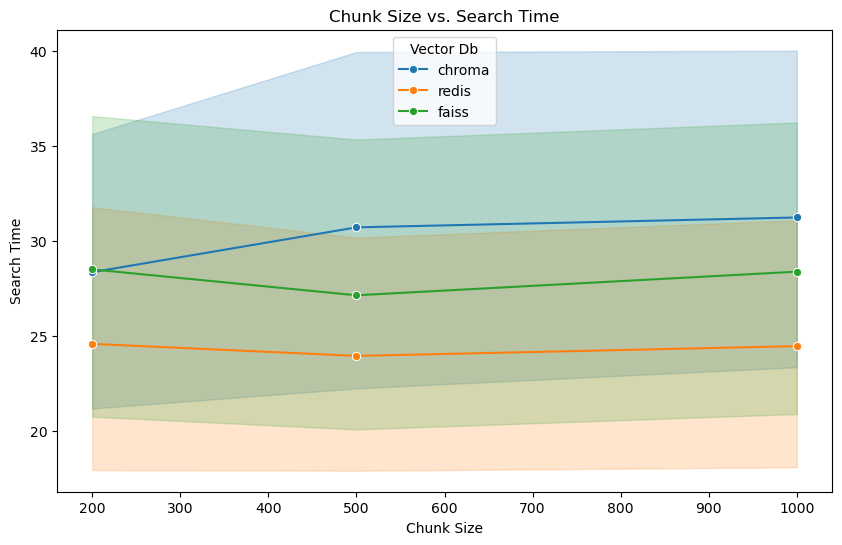

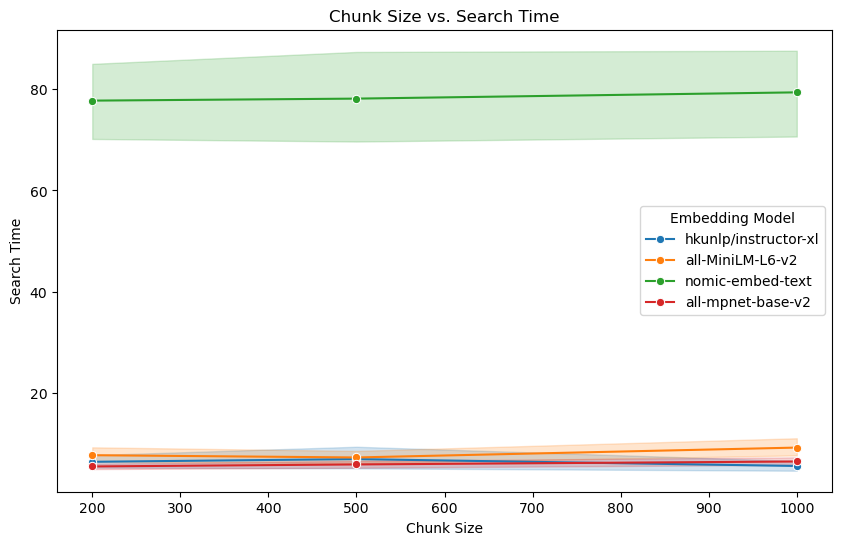

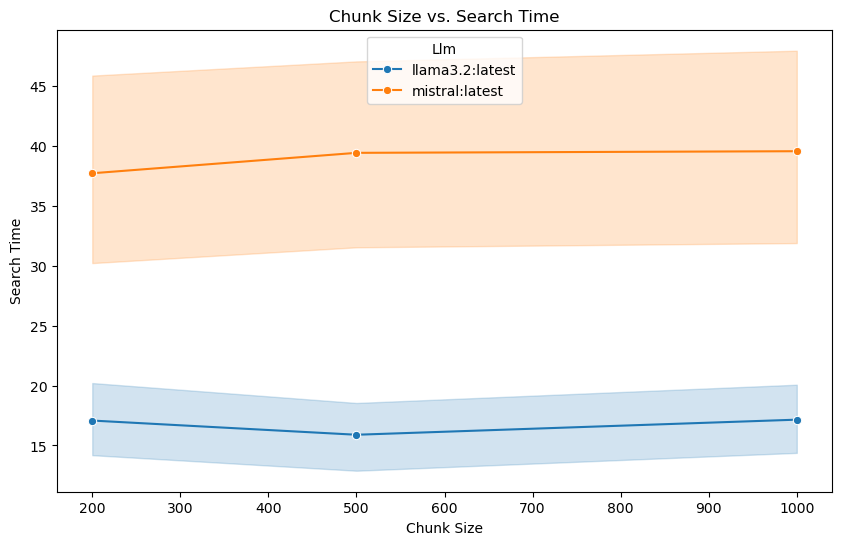

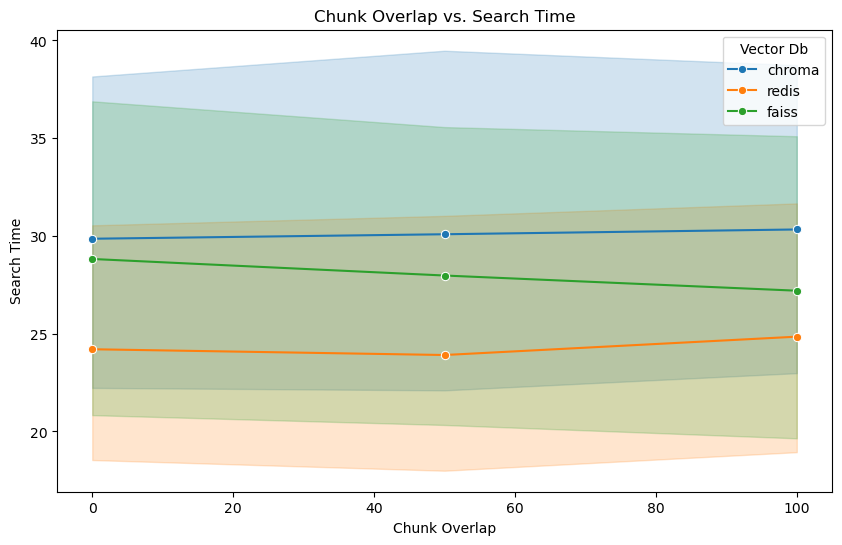

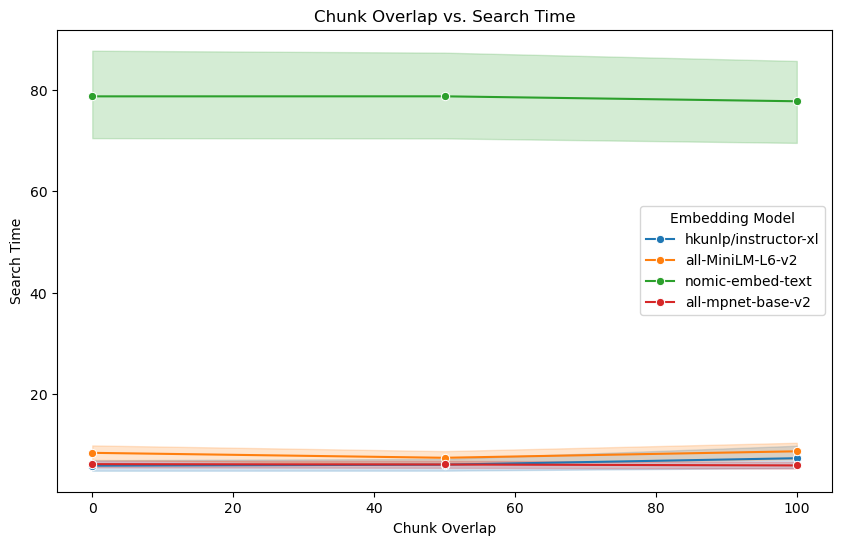

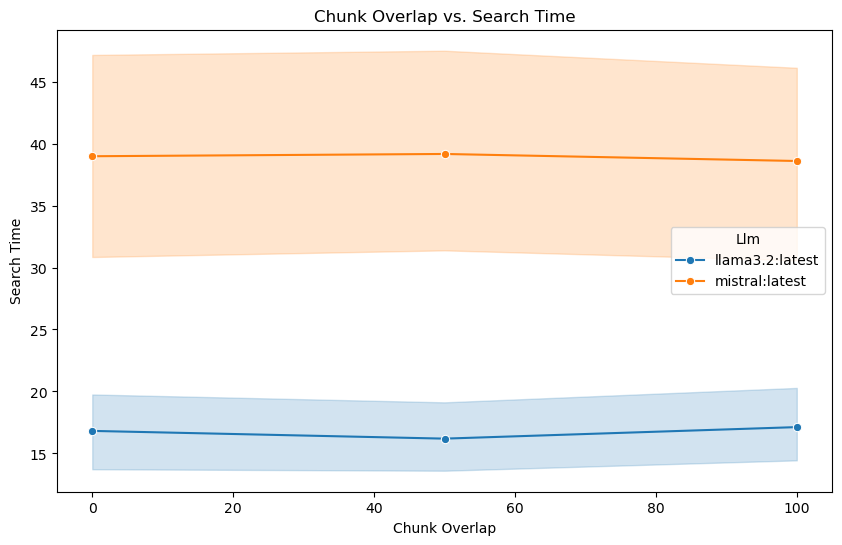

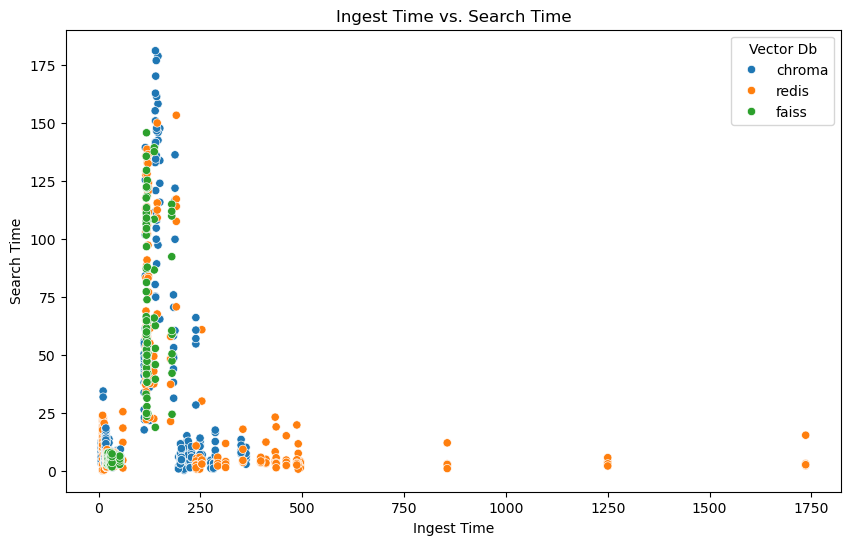

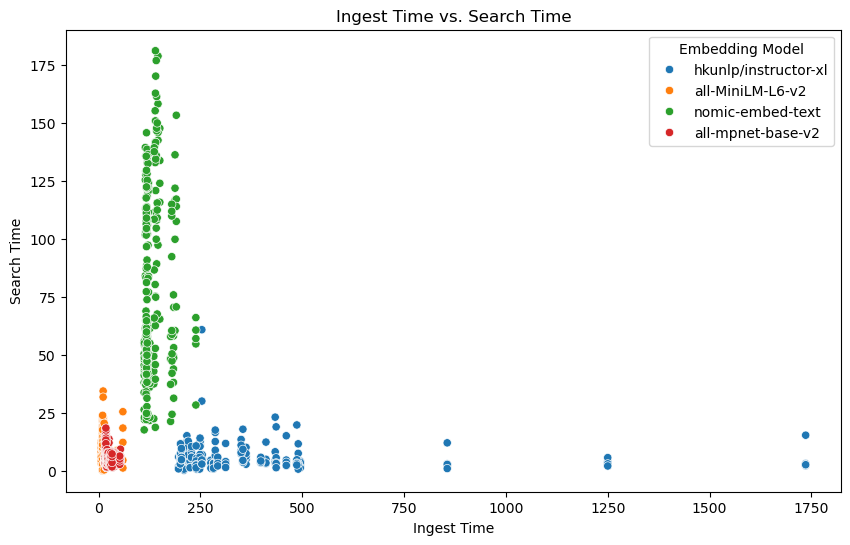

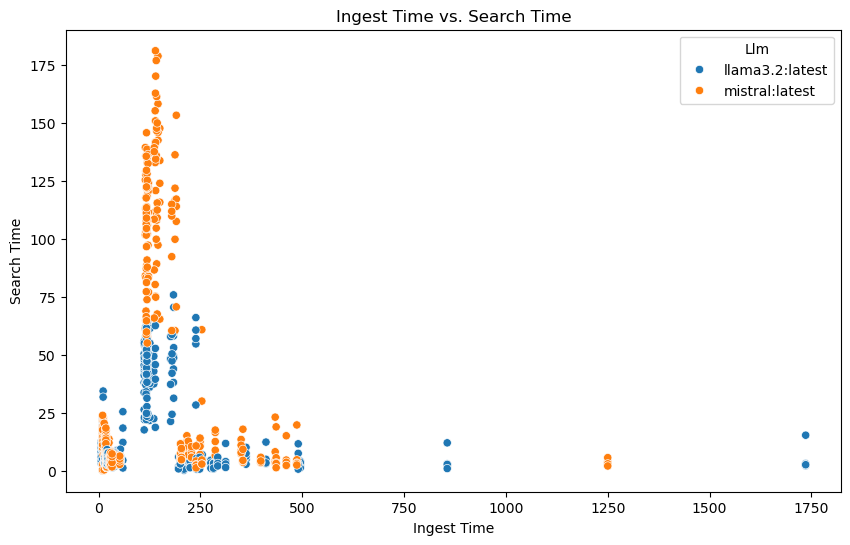

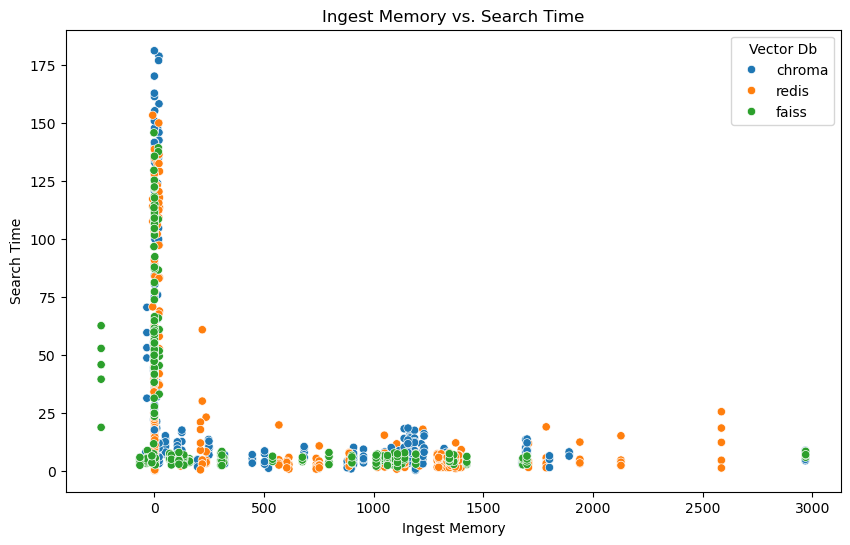

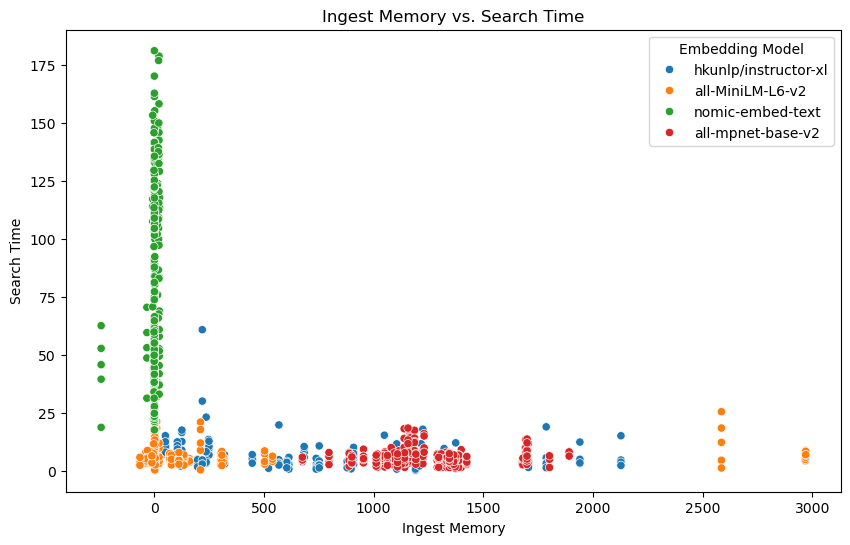

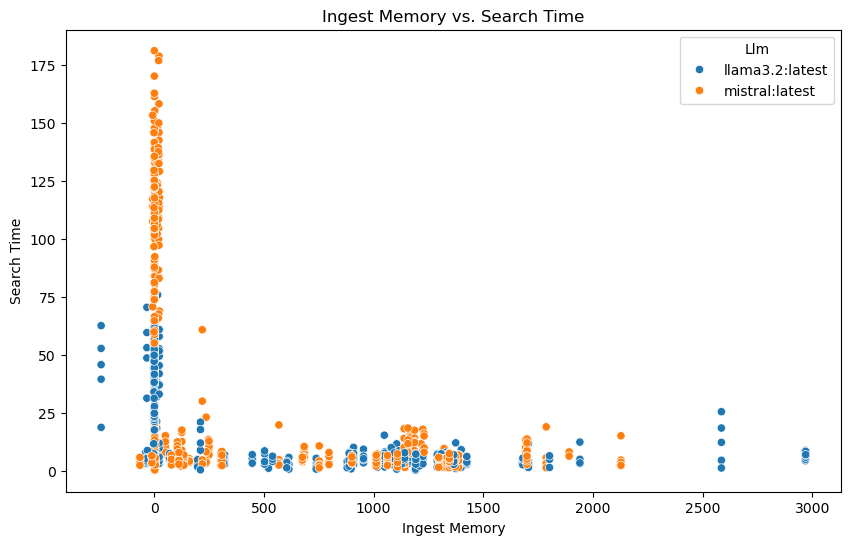

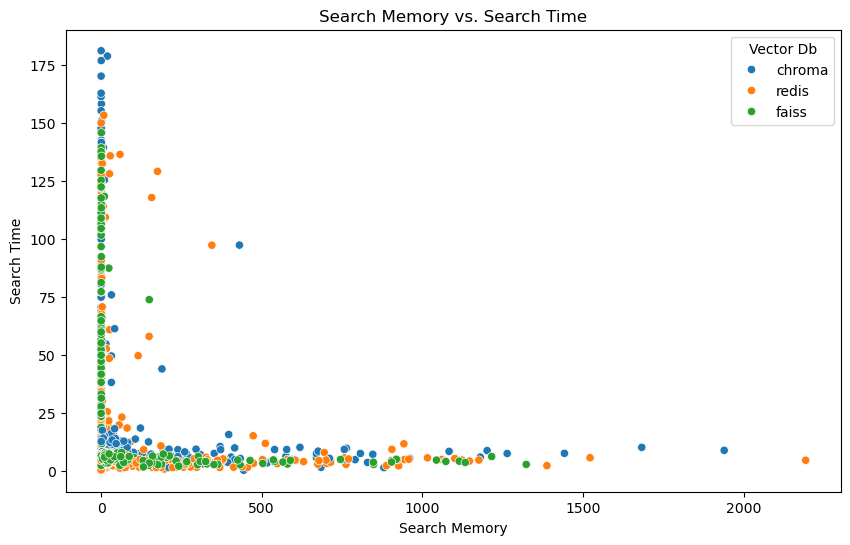

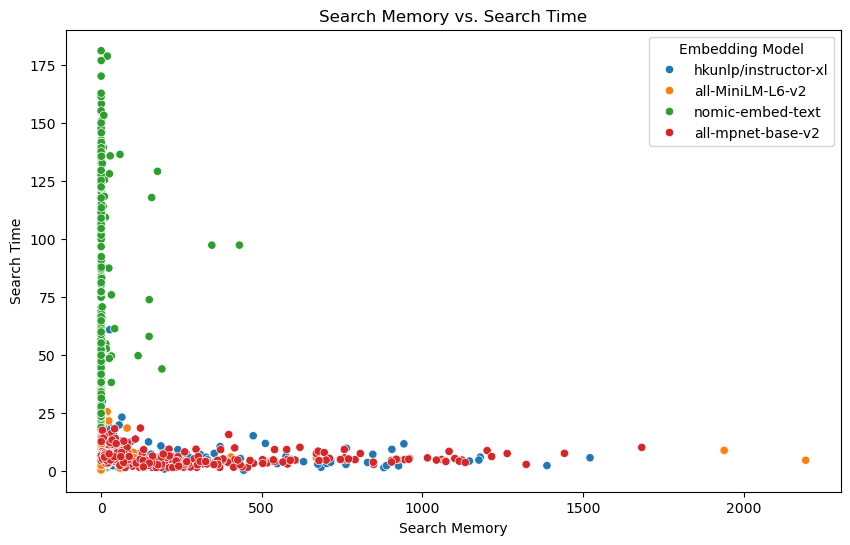

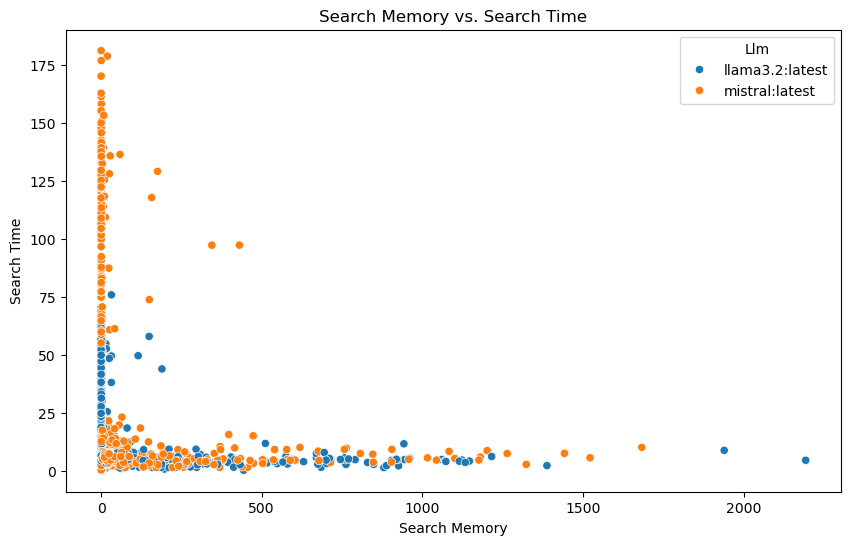

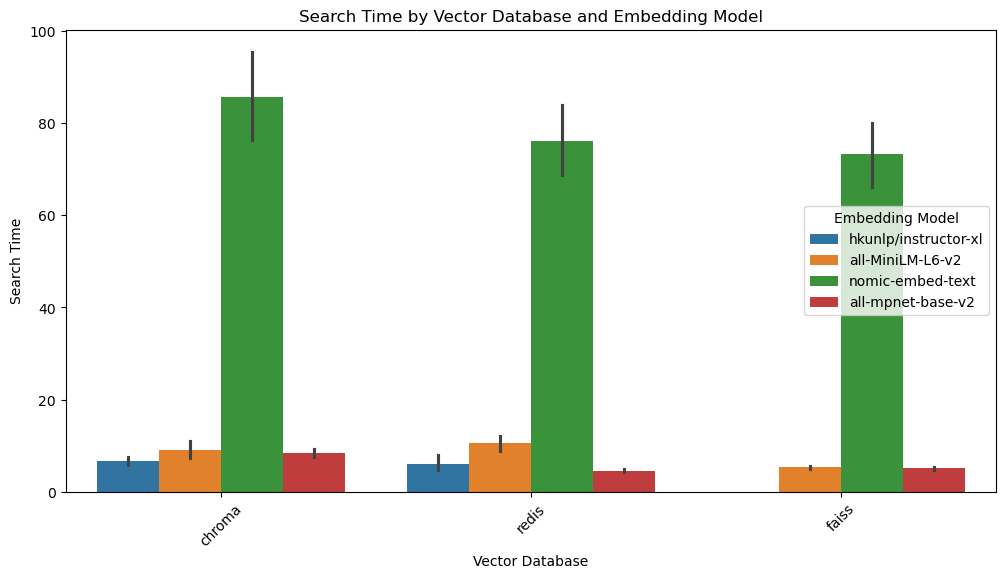

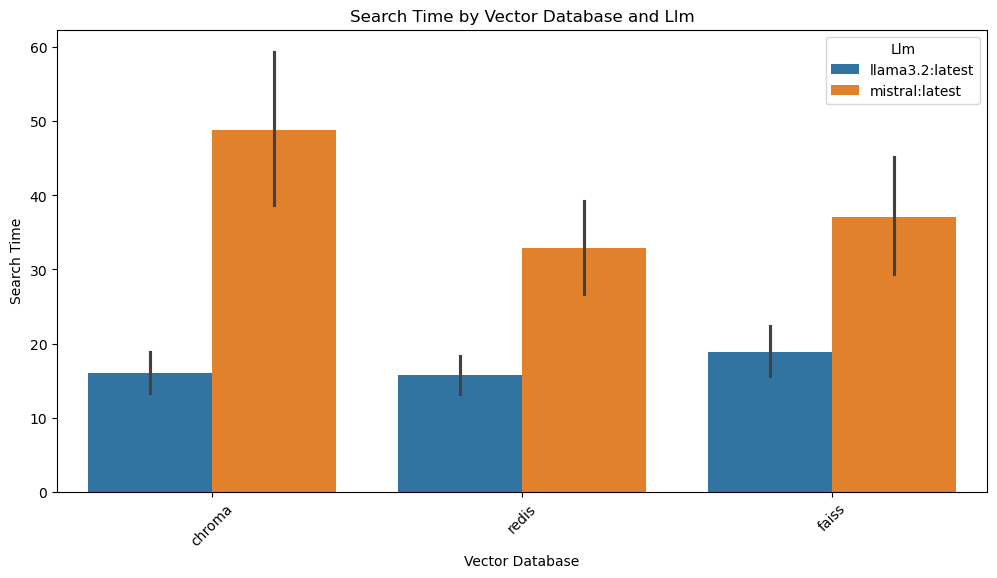

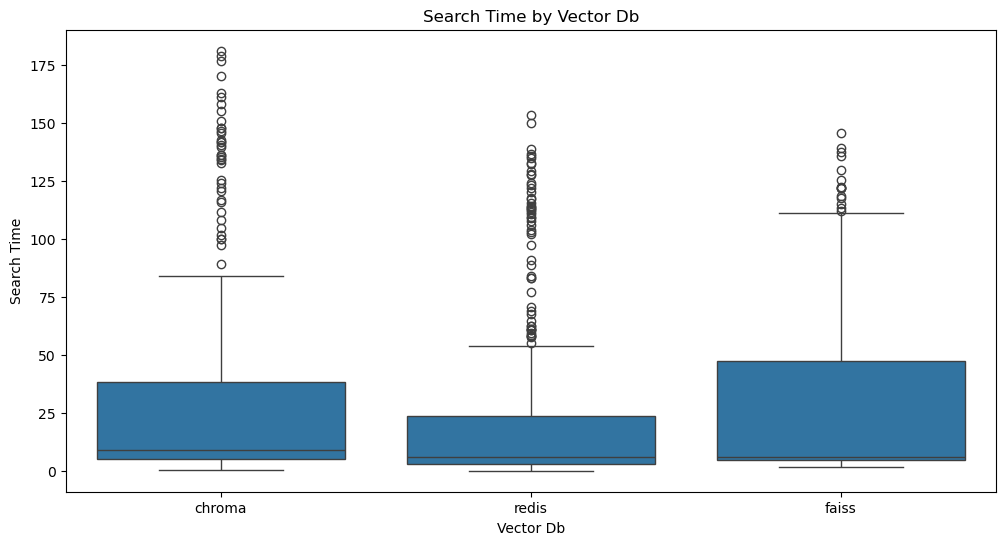

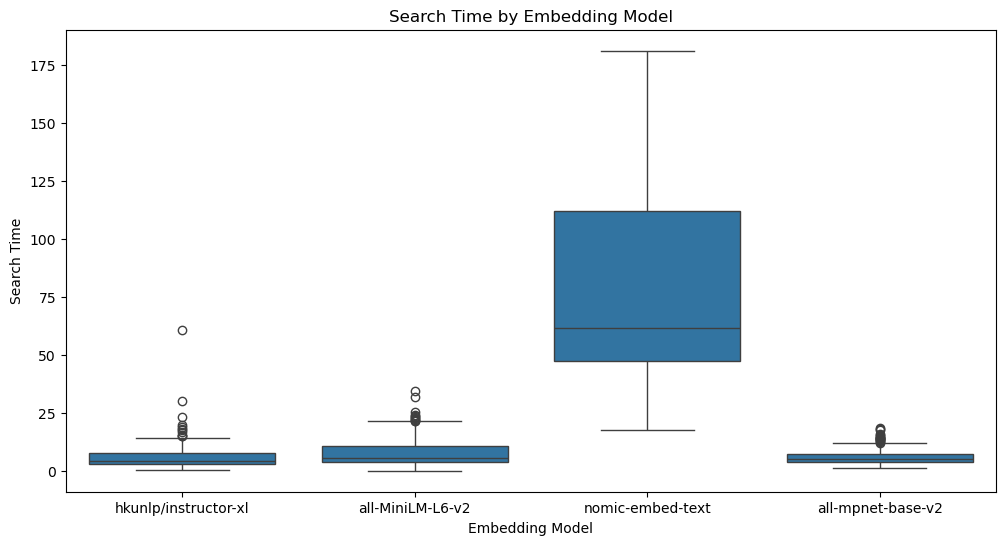

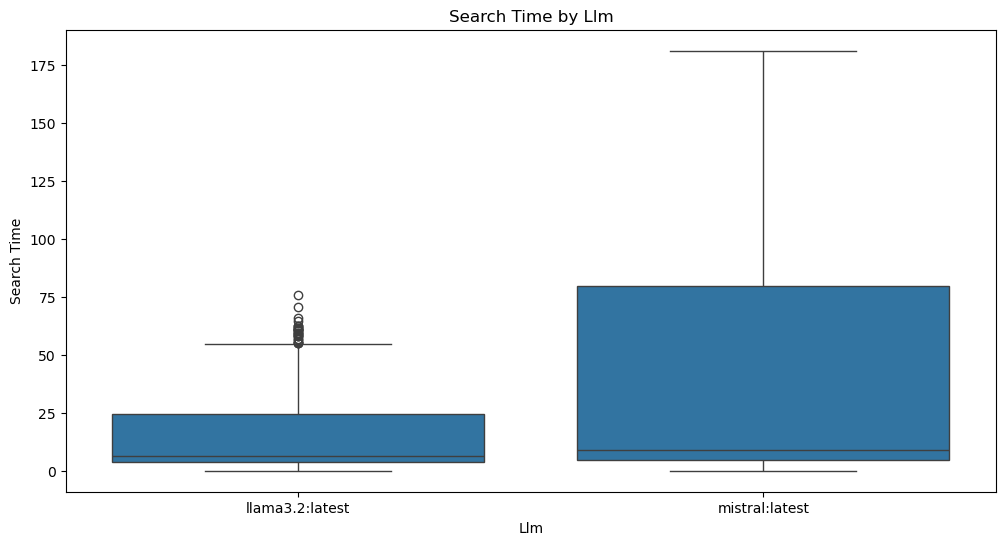

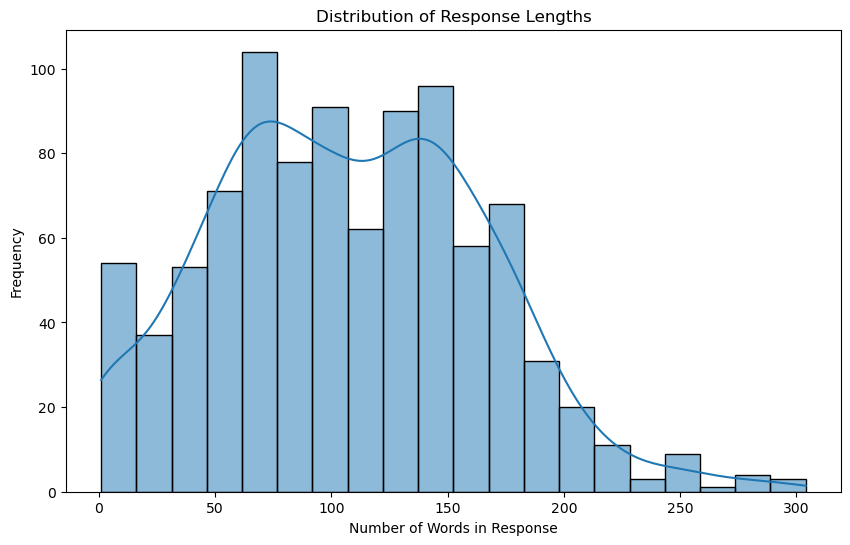

In [181]:
def generate_plots(df, target_variable):
    """
    Generates and saves plots analyzing the relationship between different factors and the specified target variable.
    :param df: Pandas DataFrame containing the data.
    :param target_variable: The variable to be analyzed (e.g., 'search_time', 'ingest_time').
    """
    # Define plot mappings
    x_vars = ['chunk_size', 'chunk_overlap', 'ingest_time', 'ingest_memory', 'search_memory']
    hue_vars = ['vector_db', 'embedding_model', 'llm']
    
    for x_var in x_vars:
        for hue_var in hue_vars:
            plt.figure(figsize=(10, 6))
            if x_var in ['ingest_time', 'ingest_memory', 'search_memory']:
                sns.scatterplot(data=df, x=x_var, y=target_variable, hue=hue_var)
            else:
                sns.lineplot(data=df, x=x_var, y=target_variable, hue=hue_var, marker='o')
            
            plt.title(f"{x_var.replace('_', ' ').title()} vs. {target_variable.replace('_', ' ').title()}")
            plt.xlabel(x_var.replace('_', ' ').title())
            plt.ylabel(target_variable.replace('_', ' ').title())
            plt.legend(title=hue_var.replace('_', ' ').title())
            plt.savefig(f"{hue_var}_{x_var}_analysis.png")
            plt.show()
    
    # Segmented Bar Charts
    for hue_var in hue_vars[1:]:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=df, x='vector_db', y=target_variable, hue=hue_var, dodge=True)
        plt.xlabel("Vector Database")
        plt.ylabel(target_variable.replace('_', ' ').title())
        plt.title(f"{target_variable.replace('_', ' ').title()} by Vector Database and {hue_var.replace('_', ' ').title()}")
        plt.legend(title=hue_var.replace('_', ' ').title())
        plt.xticks(rotation=45)
        plt.savefig(f"vector_{hue_var}_bar.png")
        plt.show()
    
    # Boxplots for Distribution Analysis
    for hue_var in hue_vars:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x=hue_var, y=target_variable)
        plt.title(f"{target_variable.replace('_', ' ').title()} by {hue_var.replace('_', ' ').title()}")
        plt.xlabel(hue_var.replace('_', ' ').title())
        plt.ylabel(target_variable.replace('_', ' ').title())
        plt.savefig(f"distrib_{hue_var}.png")
        plt.show()
    
    # Response Length Distribution
    if 'search_results' in df.columns:
        df['response_length'] = df['search_results'].astype(str).apply(lambda x: len(x.split()))
        plt.figure(figsize=(10, 6))
        sns.histplot(df['response_length'], bins=20, kde=True)
        plt.title("Distribution of Response Lengths")
        plt.xlabel("Number of Words in Response")
        plt.ylabel("Frequency")
        plt.savefig("distrib_response_length.png")
        plt.show()

generate_plots(df, 'search_time')

# y: Search Time

### X Variable Analyzed: Chunk Size

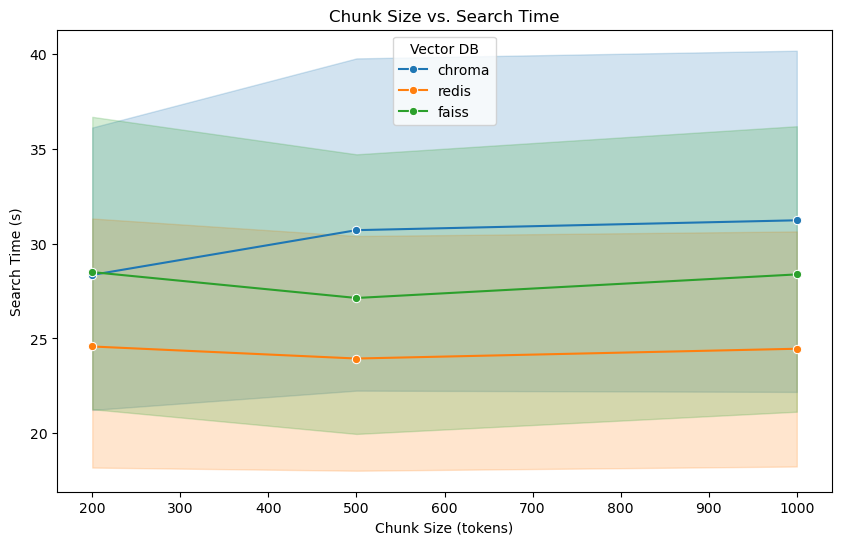

In [152]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='chunk_size', y='search_time', hue='vector_db', marker='o')
plt.title("Chunk Size vs. Search Time")
plt.xlabel("Chunk Size (tokens)")
plt.ylabel("Search Time (s)")
plt.legend(title="Vector DB")
plt.savefig("vectordb_chunksize_line")
plt.show()

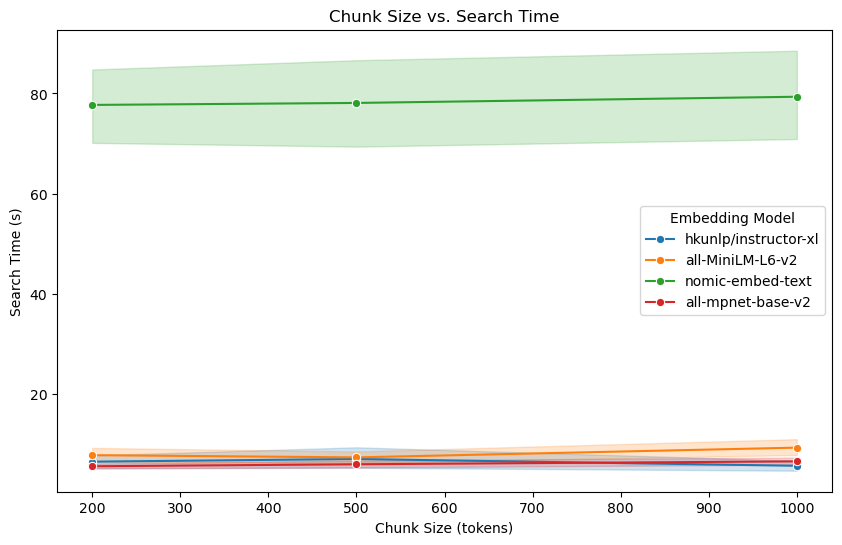

In [153]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='chunk_size', y='search_time', hue='embedding_model', marker='o')
plt.title("Chunk Size vs. Search Time")
plt.xlabel("Chunk Size (tokens)")
plt.ylabel("Search Time (s)")
plt.legend(title="Embedding Model")
plt.savefig("embed_chunksize_line")
plt.show()

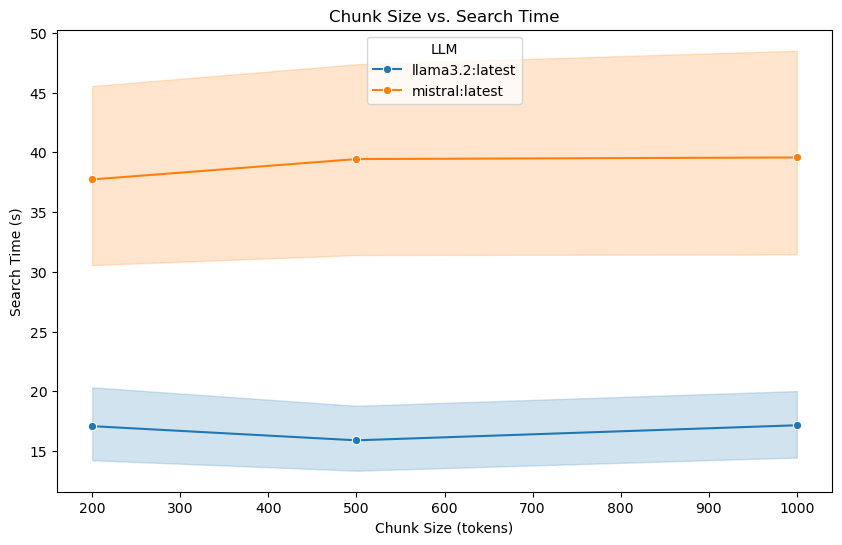

In [154]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='chunk_size', y='search_time', hue='llm', marker='o')
plt.title("Chunk Size vs. Search Time")
plt.xlabel("Chunk Size (tokens)")
plt.ylabel("Search Time (s)")
plt.legend(title="LLM")
plt.savefig("llm_chunksize_line")
plt.show()

### X Variable Analyzed: Chunk Overlap

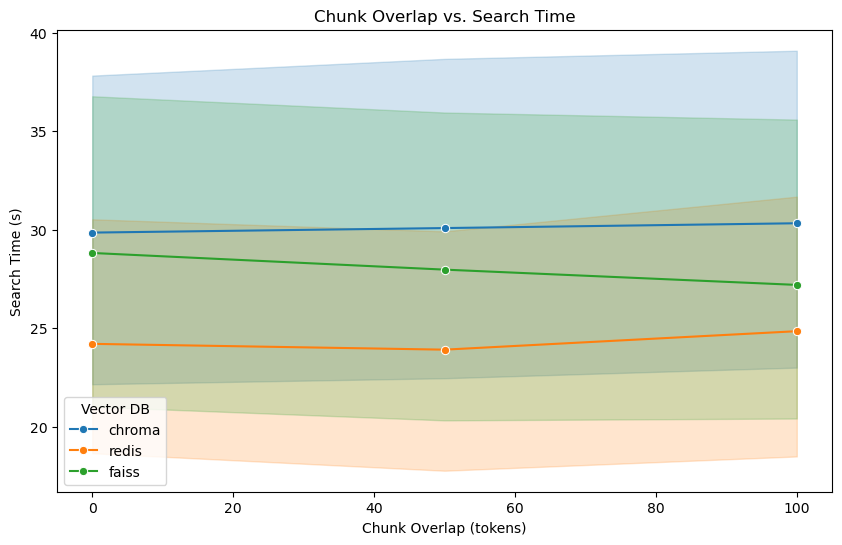

In [155]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='chunk_overlap', y='search_time', hue='vector_db', marker='o')
plt.title("Chunk Overlap vs. Search Time")
plt.xlabel("Chunk Overlap (tokens)")
plt.ylabel("Search Time (s)")
plt.legend(title="Vector DB")
plt.savefig("vector_chunkoverlap_line")
plt.show()

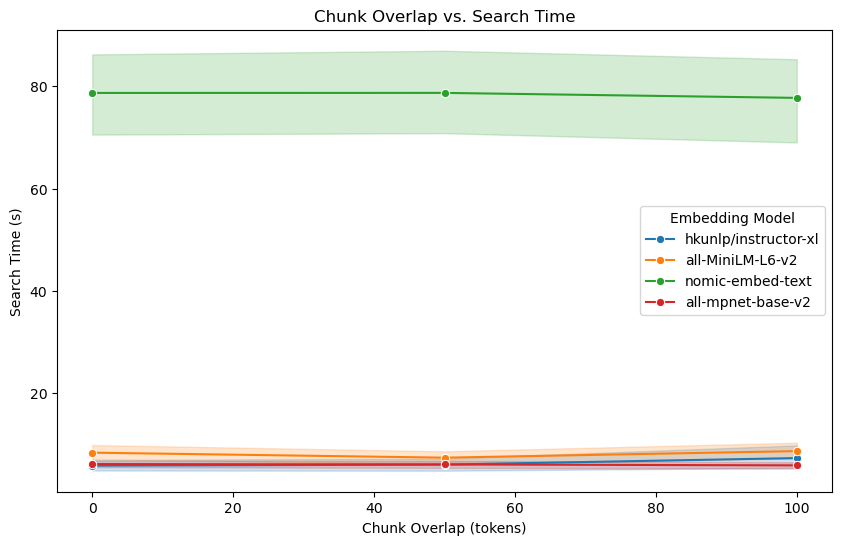

In [156]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='chunk_overlap', y='search_time', hue='embedding_model', marker='o')
plt.title("Chunk Overlap vs. Search Time")
plt.xlabel("Chunk Overlap (tokens)")
plt.ylabel("Search Time (s)")
plt.legend(title="Embedding Model")
plt.savefig("embed_chunkoverlap_line")
plt.show()

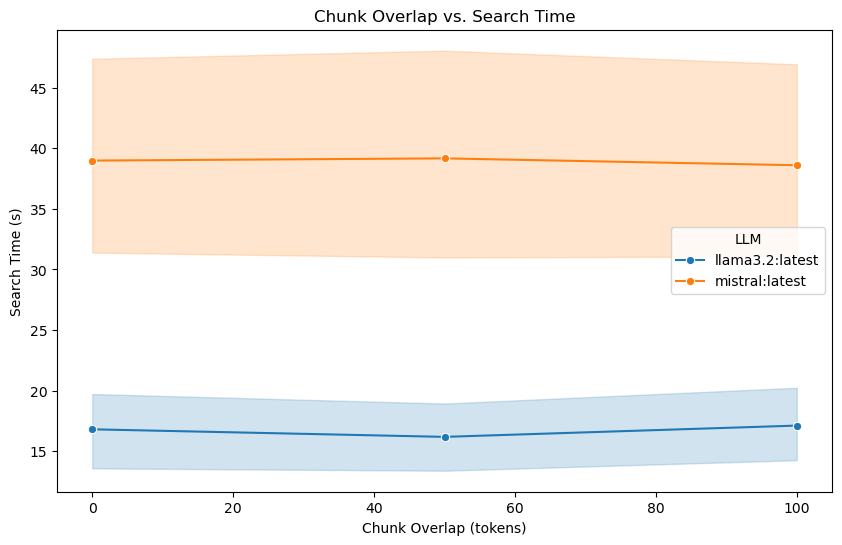

In [157]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='chunk_overlap', y='search_time', hue='llm', marker='o')
plt.title("Chunk Overlap vs. Search Time")
plt.xlabel("Chunk Overlap (tokens)")
plt.ylabel("Search Time (s)")
plt.legend(title="LLM")
plt.savefig("llm_chunkoverlap_line")
plt.show()

### X Variable Analyzed: Ingest Time

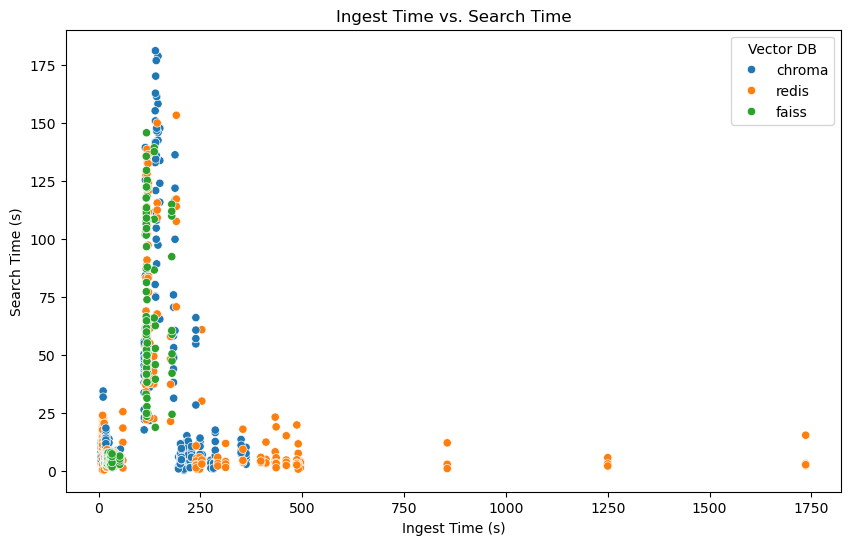

In [158]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ingest_time', y='search_time', hue='vector_db')
plt.title("Ingest Time vs. Search Time")
plt.xlabel("Ingest Time (s)")
plt.ylabel("Search Time (s)")
plt.legend(title="Vector DB")
plt.savefig("vector_ingesttime_scatter")
plt.show()

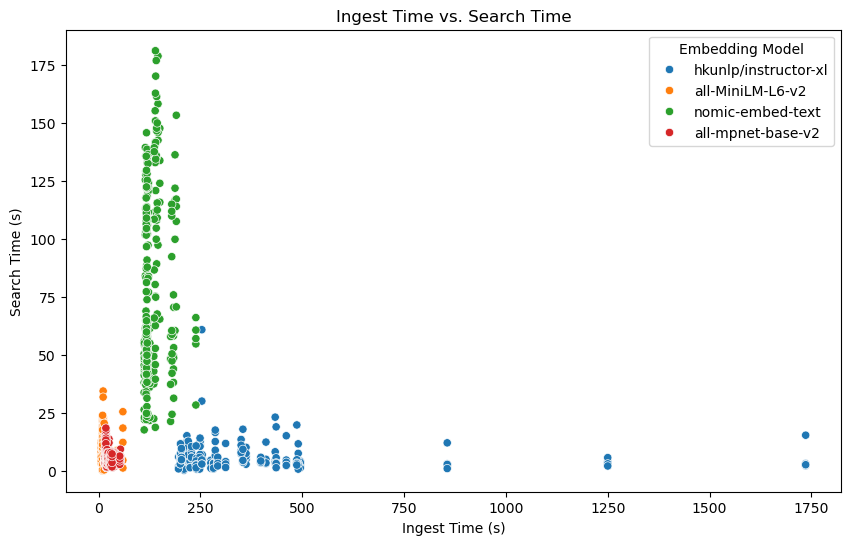

In [159]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ingest_time', y='search_time', hue='embedding_model')
plt.title("Ingest Time vs. Search Time")
plt.xlabel("Ingest Time (s)")
plt.ylabel("Search Time (s)")
plt.legend(title="Embedding Model")
plt.savefig("embed_ingesttime_scatter")
plt.show()

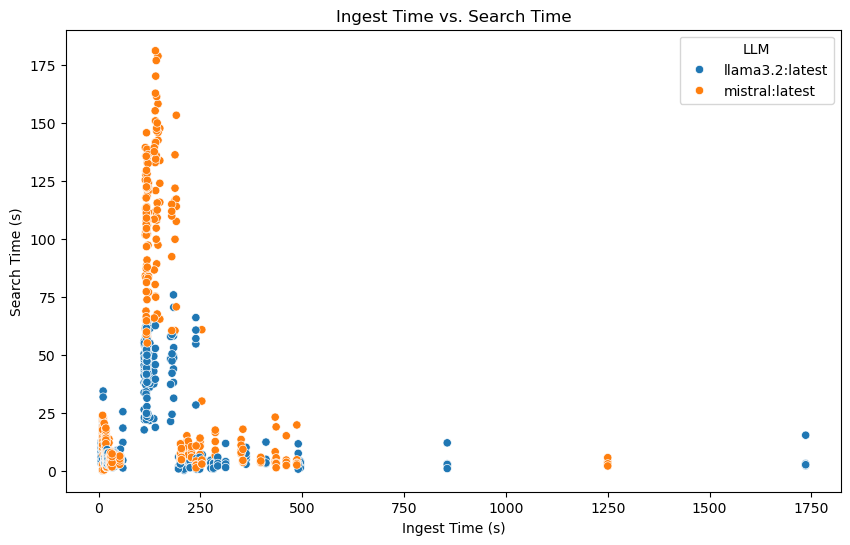

In [160]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ingest_time', y='search_time', hue='llm')
plt.title("Ingest Time vs. Search Time")
plt.xlabel("Ingest Time (s)")
plt.ylabel("Search Time (s)")
plt.legend(title="LLM")
plt.savefig("llm_ingesttime_scatter")
plt.show()

### X Variable Analyzed: Ingest Memory

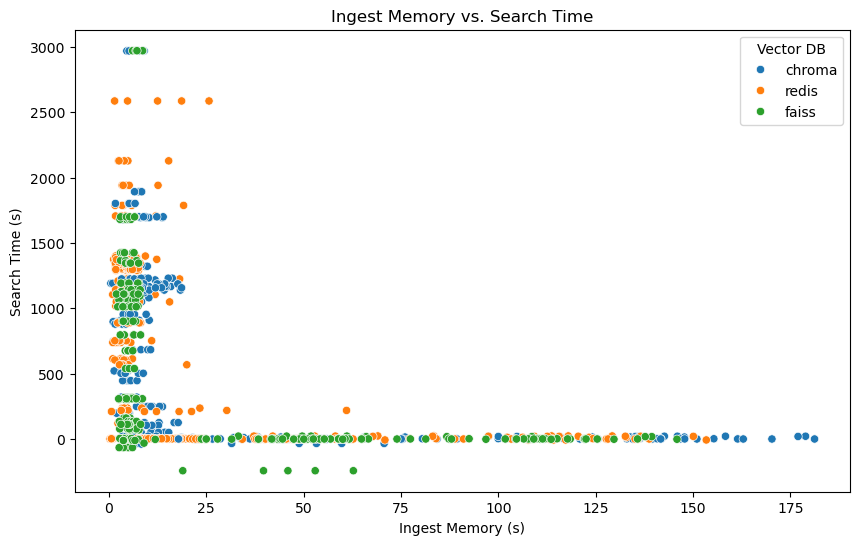

In [161]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='search_time', y='ingest_memory', hue='vector_db')
plt.title("Ingest Memory vs. Search Time")
plt.xlabel("Ingest Memory (s)")
plt.ylabel("Search Time (s)")
plt.legend(title="Vector DB")
plt.savefig("vector_ingestmem_scatter")
plt.show()

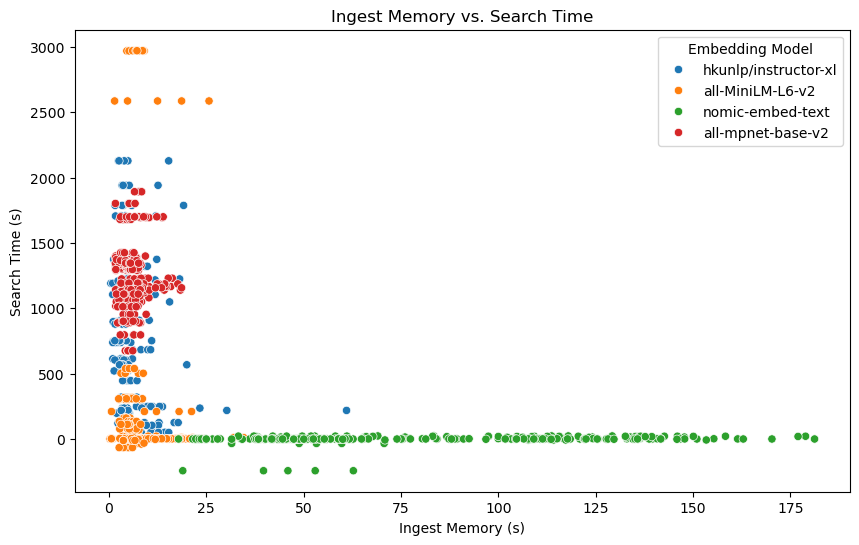

In [162]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='search_time', y='ingest_memory', hue='embedding_model')
plt.title("Ingest Memory vs. Search Time")
plt.xlabel("Ingest Memory (s)")
plt.ylabel("Search Time (s)")
plt.legend(title="Embedding Model")
plt.savefig("embed_ingestmem_scatter")
plt.show()

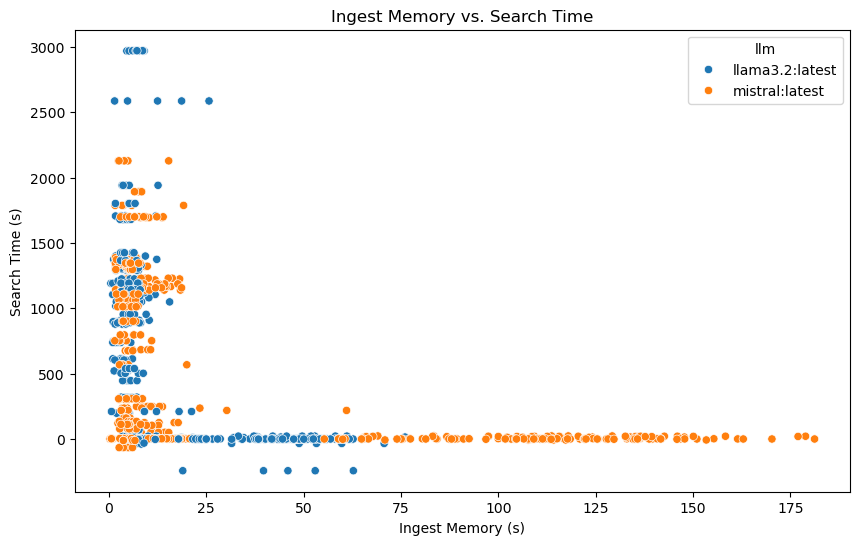

In [163]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='search_time', y='ingest_memory', hue='llm')
plt.title("Ingest Memory vs. Search Time")
plt.xlabel("Ingest Memory (s)")
plt.ylabel("Search Time (s)")
plt.legend(title="llm")
plt.savefig("llm_ingestmem_scatter")
plt.show()

### X Variable Analyzed: Search Memory

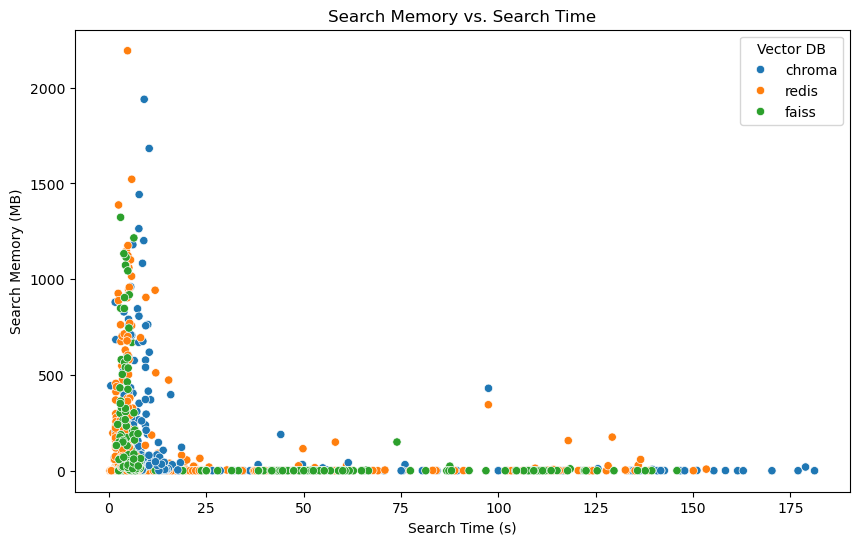

In [164]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='search_time', y='search_memory', hue='vector_db')
plt.title("Search Memory vs. Search Time")
plt.xlabel("Search Time (s)")
plt.ylabel("Search Memory (MB)")
plt.legend(title="Vector DB")
plt.savefig("vector_searchmem_scatter")
plt.show()

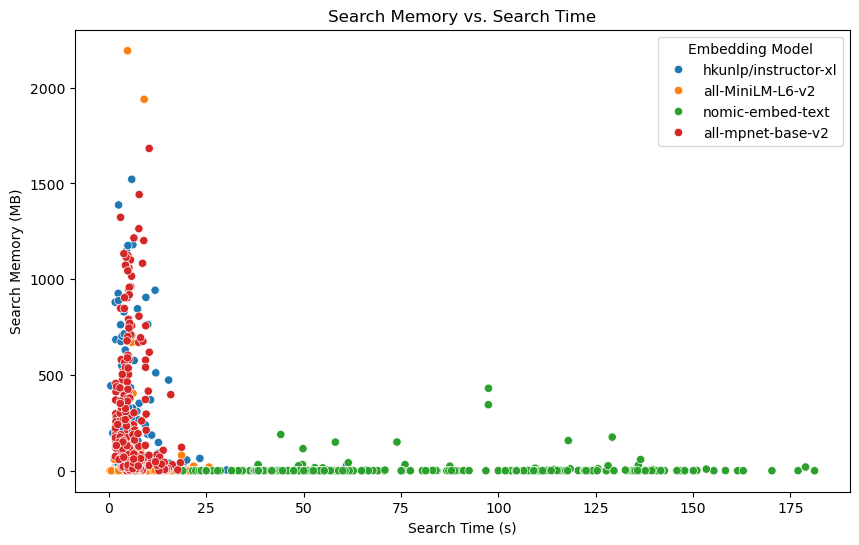

In [165]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='search_time', y='search_memory', hue='embedding_model')
plt.title("Search Memory vs. Search Time")
plt.xlabel("Search Time (s)")
plt.ylabel("Search Memory (MB)")
plt.legend(title="Embedding Model")
plt.savefig("embed_searchmem_scatter")
plt.show()

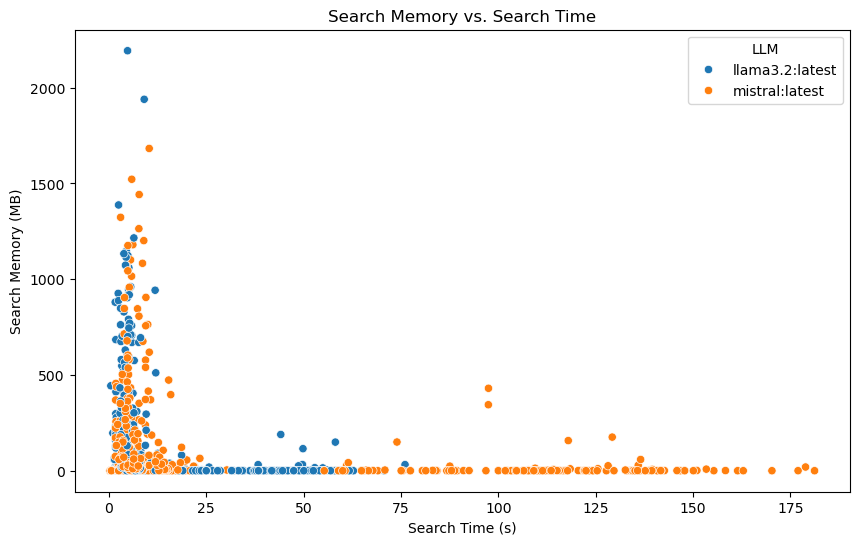

In [166]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='search_time', y='search_memory', hue='llm')
plt.title("Search Memory vs. Search Time")
plt.xlabel("Search Time (s)")
plt.ylabel("Search Memory (MB)")
plt.legend(title="LLM")
plt.savefig("llm_searchmem_scatter")
plt.show()

### Variable Analyzed: Segmented Bar Chart with 2 X Variables

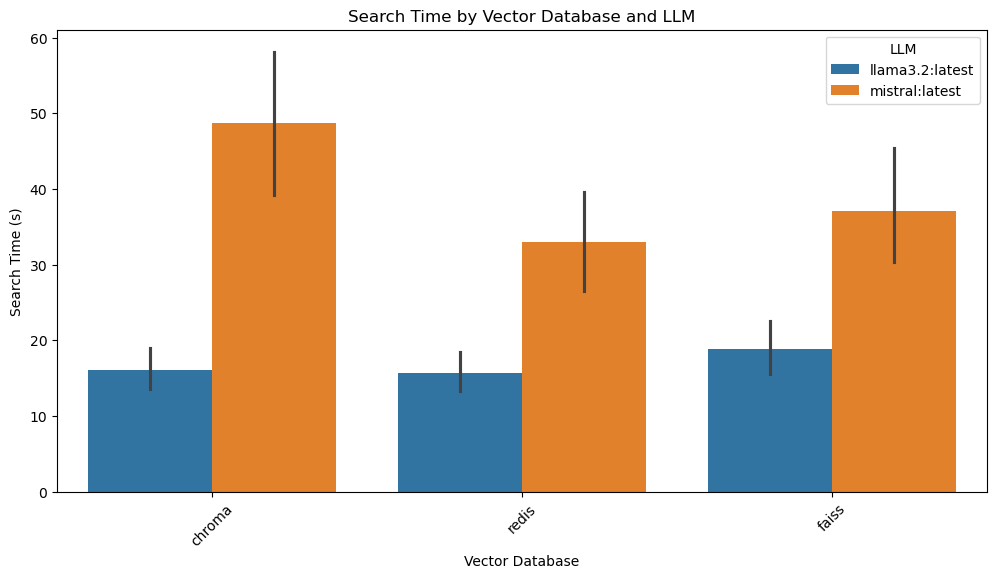

In [167]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="vector_db", y="search_time", hue="llm", dodge=True)
plt.xlabel("Vector Database")
plt.ylabel("Search Time (s)")
plt.title("Search Time by Vector Database and LLM")
plt.legend(title="LLM")
plt.xticks(rotation=45)
plt.savefig("vector_llm_bar")
plt.show()

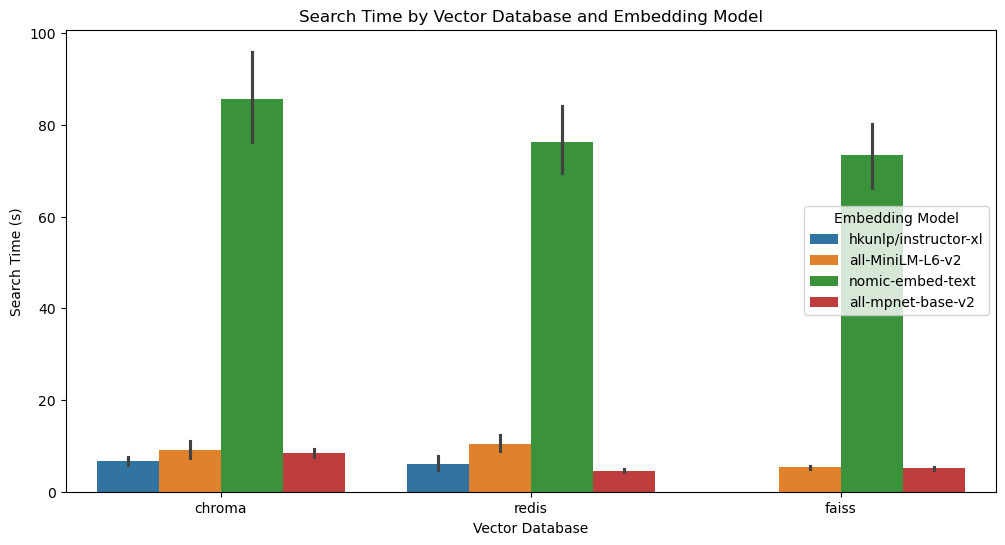

In [168]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="vector_db", y="search_time", hue="embedding_model", dodge=True)
plt.xlabel("Vector Database")
plt.ylabel("Search Time (s)")
plt.title("Search Time by Vector Database and Embedding Model")
plt.legend(title="Embedding Model")
plt.savefig("vector_embed_bar")
plt.show()

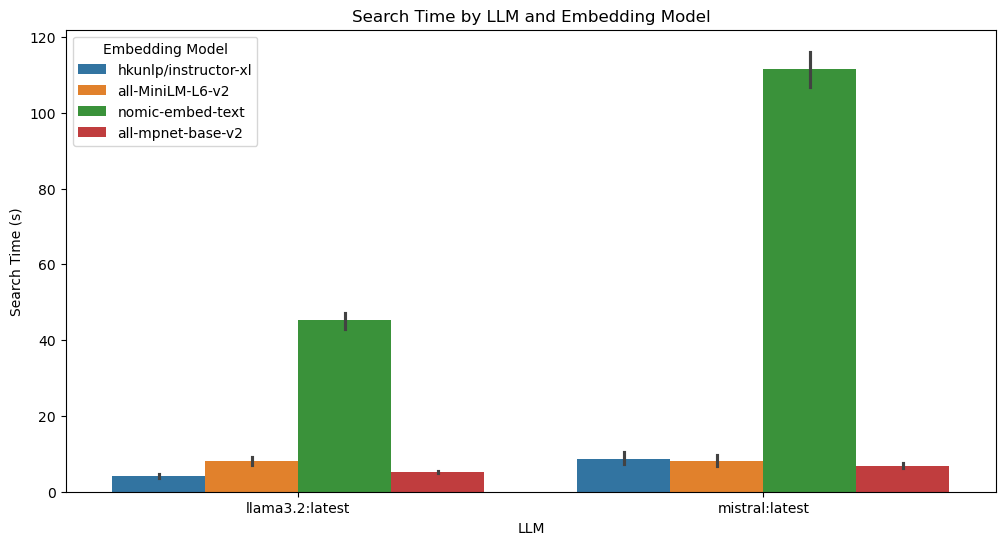

In [169]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="llm", y="search_time", hue="embedding_model", dodge=True)
plt.xlabel("LLM")
plt.ylabel("Search Time (s)")
plt.title("Search Time by LLM and Embedding Model")
plt.legend(title="Embedding Model")
plt.savefig("embed_llm_bar")
plt.show()

### Variable Analyzed: All 3 Variables

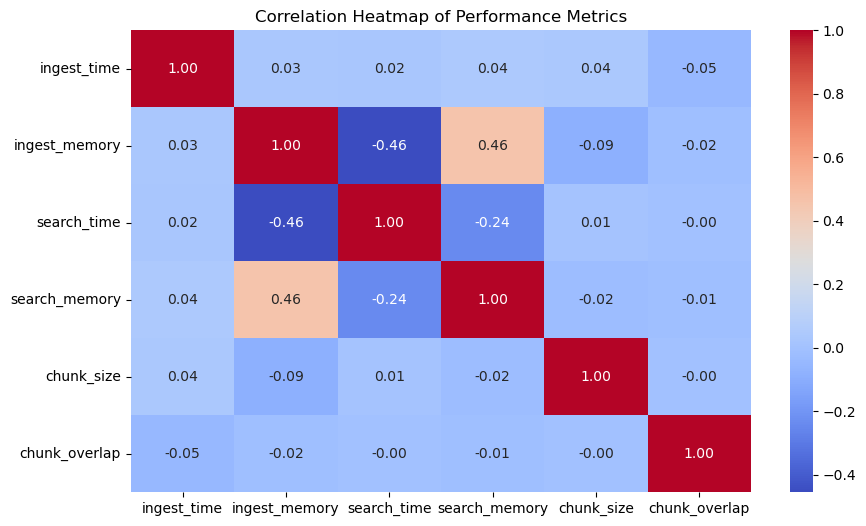

In [170]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['ingest_time', 'ingest_memory', 'search_time', 'search_memory', 'chunk_size', 'chunk_overlap']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Performance Metrics")
plt.savefig("correlationmatrix")
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


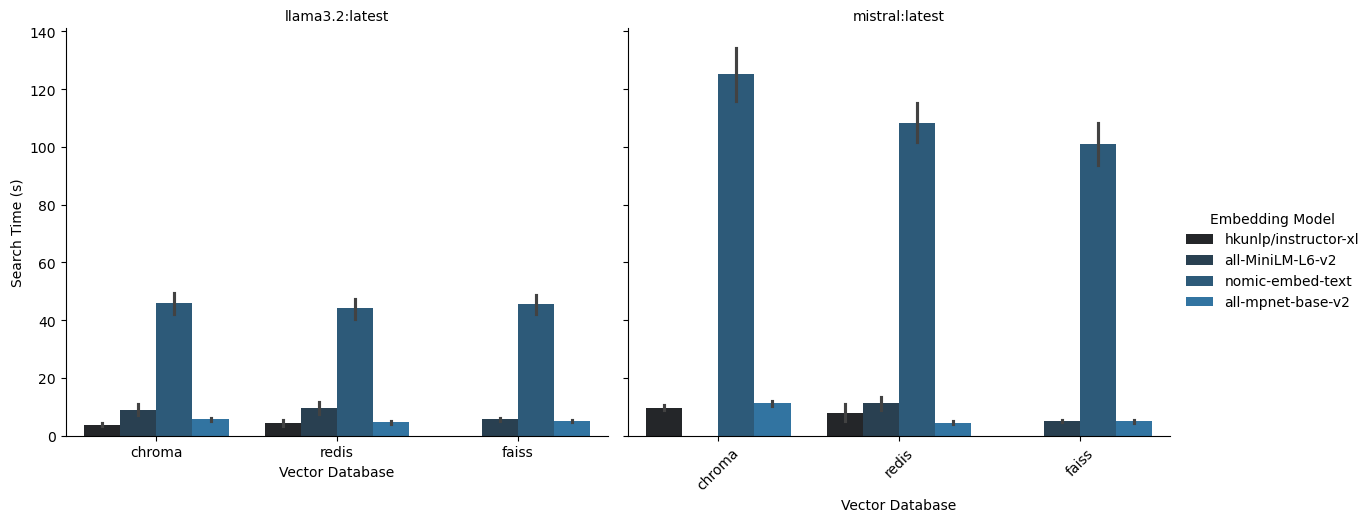

In [171]:
# Set up FacetGrid for LLMs
g = sns.FacetGrid(df, col="llm", height=5, aspect=1.2)
g.map_dataframe(sns.barplot, x="vector_db", y="search_time", hue="embedding_model", dodge=True)

# Customize labels and title
g.set_axis_labels("Vector Database", "Search Time (s)")
g.set_titles(col_template="{col_name}")
g.add_legend(title="Embedding Model")

plt.xticks(rotation=45)
plt.savefig("all_three_variables")
plt.show()

### Variable Analyzed: Distribution of 3 Individual Variables

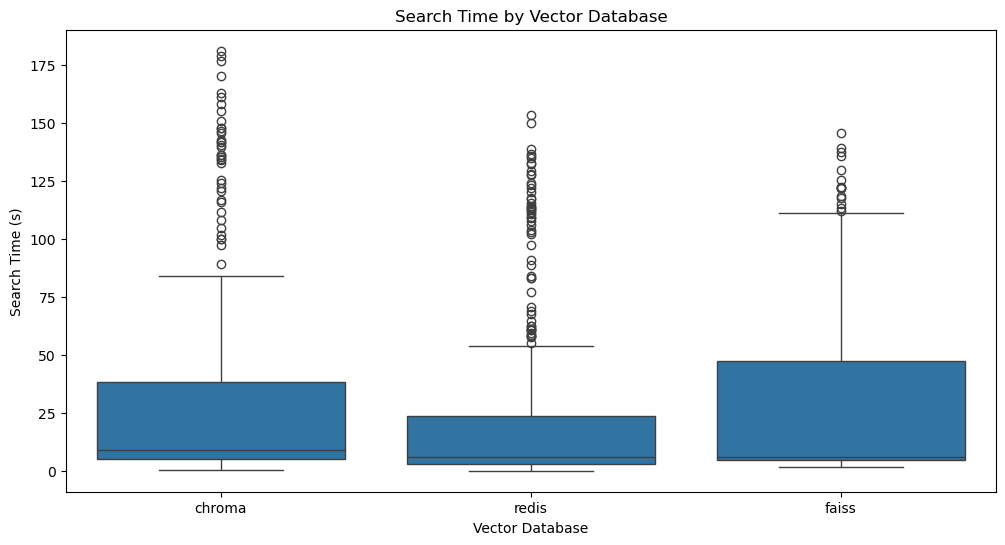

In [172]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="vector_db", y="search_time")
plt.title("Search Time by Vector Database")
plt.xlabel("Vector Database")
plt.ylabel("Search Time (s)")
plt.savefig("distrib_vector")
plt.show()

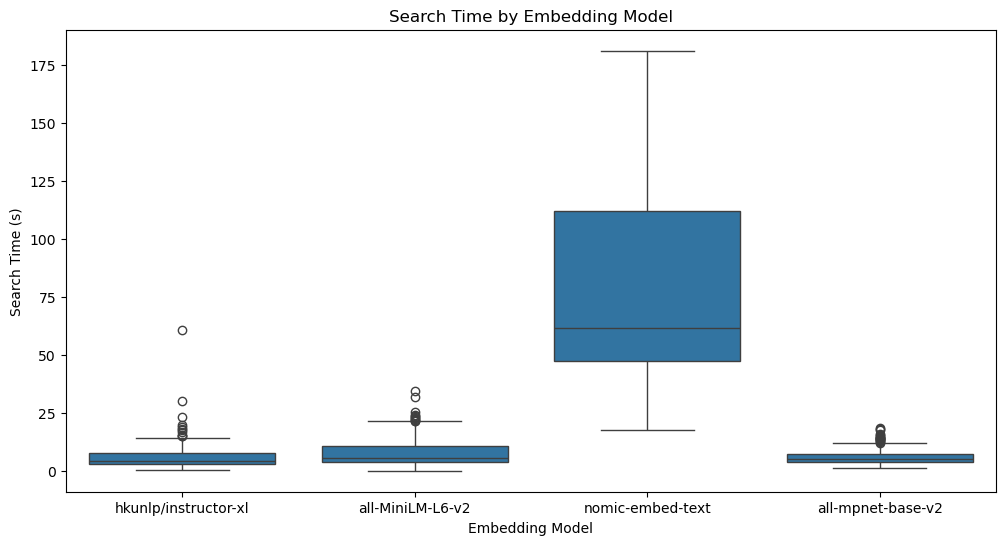

In [173]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="embedding_model", y="search_time")
plt.title("Search Time by Embedding Model")
plt.xlabel("Embedding Model")
plt.ylabel("Search Time (s)")
plt.savefig("distrib_embed")
plt.show()

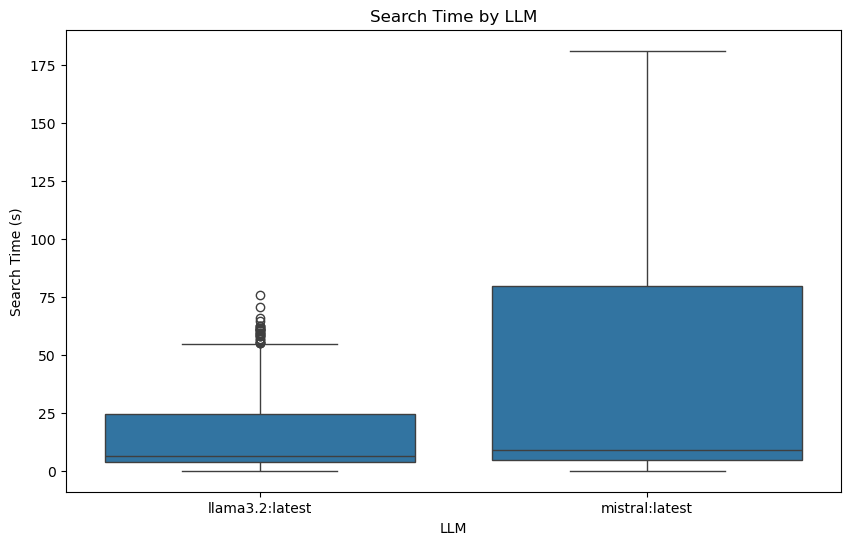

In [174]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='llm', y='search_time')
plt.title("Search Time by LLM")
plt.xlabel("LLM")
plt.ylabel("Search Time (s)")
plt.savefig("distrib_llm")
plt.show()

### Miscellaenous Analysis

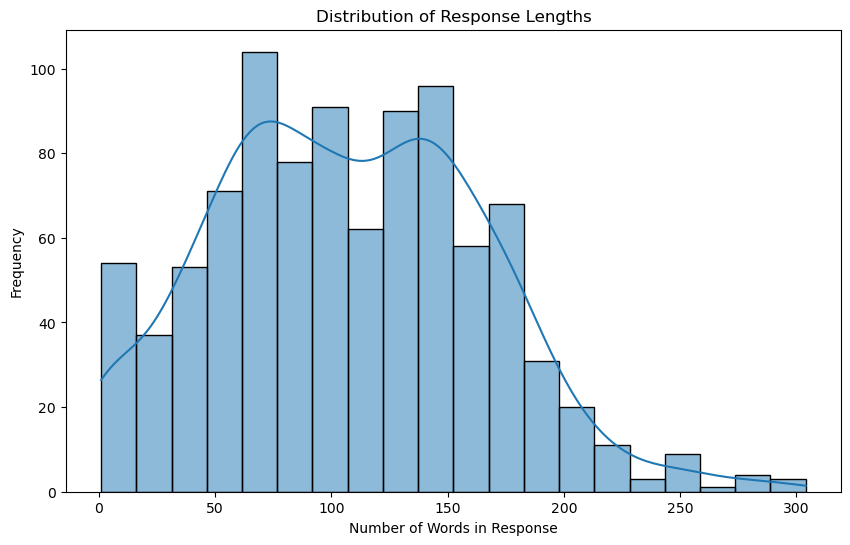

In [175]:
df['response_length'] = df['search_results'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['response_length'], bins=20, kde=True)
plt.title("Distribution of Response Lengths")
plt.xlabel("Number of Words in Response")
plt.ylabel("Frequency")
plt.savefig("distrib_response_length")
plt.show()